In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

start = time.time()

data_folder = "data"
article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2019-06-01.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print("Event", events.keys())
article_df.head(3)

print("Setup time: %d seconds" % np.round(time.time() - start))

N = len(article_df)
N_top50 = np.sum(1 - np.isnan(article_df["event"]))
print("Number of singletons: %d" % len(events['singletons']))
print("Number of articles clustered into top 50 events: %d/%d (.%d)" % (N_top50, N, round(N_top50/N, 2) * 100))

Event dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])
Setup time: 2 seconds
Number of singletons: 64173
Number of articles clustered into top 50 events: 33124/100756 (.33)


Mean: 2720.817000, 5/25/50/75/95 percentiles: [ 170.9   849.25 1928.   3983.5  7257.25]


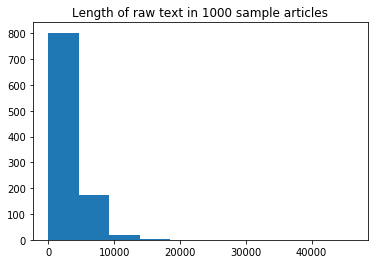

In [19]:
dd = comparisons.DuplicationDetection()
n = 1000
sample = random.sample(list(article_df["id"]), n)
article_dict = dd.dict_by_ids(article_df, sample)
start = time.time()

text_len = [len(str(article_dict[id])) for id in article_dict.keys()]
plt.hist(text_len)
plt.title("Length of raw text in %d sample articles" % n)
print("Mean: %2f, 5/25/50/75/95 percentiles:" % (np.mean(text_len)), np.percentile(text_len, [5, 25, 50, 75, 95]))

In [16]:
article_dict_good = dd.dict_by_ids(article_df, [i for i in sample if article_df.loc[i, "paywall"] == 0])
article_dict_bad = dd.dict_by_ids(article_df, [i for i in sample if article_df.loc[i, "paywall"] > 0])
print("Sample 'bad' articles: ")
for s in [str(article_dict[i]) for i in random.sample(list(article_dict_bad), 10)]:
    print(s, "\n")
len(article_dict_bad), len(article_dict_good)

Sample 'bad' articles: 
@USATOpinion 1 week 
 from revclbryant 2020 joe biden isn t too moderate democrats are too radical trump may be best option 
  From @RevCLBryant: 2020: Joe #Biden isn't too moderate, #Democrats are too radical. Trump may be best option. 

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
  u/xTheCrazy 
 for her feet can do more 
 than her naginata can 
  I am now confused and scared at the same time... 
  Reply 
  On the last round where shit get's serious, you have to become the law. Only with its power you can win 
 Reply 

Chicago Cubs vs. St. Louis Cardinals 
 MLB.tv • MLB 
  ESPN+/ 
  Yes 

Avozilla, 2-pound avocado, is back in Australia 
 Share: 
  wabc 
  Holy guacamole! The Avozilla is back in Australia. 
  Check out the giant avocado. It's the second year in a row the Avozilla will be in Australian markets. 
  It typically weighs over 2 pounds and each one sells from $8 to $16. 
  There's only one grower in Au

(202, 798)

In [6]:
score_mat = ac.jac_score_mat(article_dict_bad)
axislabels = list(article_dict_bad.keys())
clusters = ac.get_article_clusters(article_dict_bad)
ac.prop_unique_clusters()
# 189/1000 bad articles, 2.5s, 49.2% unique
# 186/1000 bad articles, 7.3s, 52.2% unique
# 184/1000 bad articles, 12s, 49.5% unique
# 183/1000 bad articles, 9.5s, 49.5% 
# 181/1000 bad articles, 6s, 51.4% unique
# 197/1000 bad articles, 8.6s, 53.8% unique 
# 202/1000, 8.7s, 55% unique

0 / 202 done, 0.0 seconds elapsed
61 / 202 done, 4.34 seconds elapsed
81 / 202 done, 5.53 seconds elapsed
101 / 202 done, 6.43 seconds elapsed
162 / 202 done, 8.37 seconds elapsed
182 / 202 done, 8.72 seconds elapsed


0.5495049504950495

In [16]:
score_mat = ac.jac_score_mat(article_dict_good)
axislabels = list(article_dict_good.keys())
clusters = ac.get_article_clusters()
ac.prop_unique_clusters()
# 817/1000 good articles, 2.25h, 69% unique
# 819/1000 good articles, 1.25h, 68.5% unique 
# 803/1000 good articles, 1.5h, 67.2% unique 
# 798/1000 good articles, 1.5h, 67.4% unique

0 / 798 done, 0.0 seconds elapsed
80 / 798 done, 1176.63 seconds elapsed
160 / 798 done, 2321.25 seconds elapsed
399 / 798 done, 5205.22 seconds elapsed
479 / 798 done, 6021.8 seconds elapsed
559 / 798 done, 6727.26 seconds elapsed


0.6741854636591479

In [3]:
# If we didn't separate bad and good articles:
(202 * 0.5495049504950495 + 798 * 0.6741854636591479)/1000

0.649

In [11]:
n = 1000
singleton_sample = random.sample(list(article_df.loc[np.isnan(article_df["event"]), "id"]), n)
singleton_dict_good = dict_by_ids(article_df, [i for i in singleton_sample if article_df.loc[i, "paywall"] == 0])
singleton_dict_bad = dict_by_ids(article_df, [i for i in singleton_sample if article_df.loc[i, "paywall"] > 0])

In [12]:
score_mat = ac.jac_score_mat(singleton_dict_bad)
print(ac.prop_unique_clusters())

print("%s seconds taken" % np.round(time.time() - start, 2), "for %d bad singleton articles" % len(singleton_dict_bad))
# 261/1000 bad singleton articles, 1.5m, 45.6% unique
# 228/1000 bad singleton articles, 47s, 53.9% unique
# 248/1000, 20s, 50.4% unique
# 233/1000, 33s, 51.9%
# 246/1000, 43.9% 

0 / 246 done, 0.0 seconds elapsed
25 / 246 done, 3.26 seconds elapsed
74 / 246 done, 8.59 seconds elapsed
148 / 246 done, 13.99 seconds elapsed
197 / 246 done, 16.28 seconds elapsed
0.43902439024390244
11766.55 seconds taken for 246 bad singleton articles


In [13]:
score_mat = ac.jac_score_mat(singleton_dict_good)
print(ac.prop_unique_clusters())

print("%s seconds taken" % np.round(time.time() - start, 2), "for %d good singleton articles" % len(singleton_dict_good))
# 772/1000 good singleton articles, ~1.5h, 72.9% unique 
# 752/1000, 77.4% unique 
# 767/1000, 69.5%
# 754/1000, 69.5% 

0 / 754 done, 0.0 seconds elapsed
151 / 754 done, 1672.96 seconds elapsed
302 / 754 done, 2737.87 seconds elapsed
528 / 754 done, 3795.75 seconds elapsed
679 / 754 done, 4123.06 seconds elapsed
0.6949602122015915
15925.68 seconds taken for 754 good singleton articles


Average % unique articles, weighted by cluster size (thresh = 0.25):  0.20995696165546118
thresh = 0.75:  0.36931487730367185
Average % unique 'good' articles, weighted by cluster size (thresh = 0.25):  0.21161014643622142
thresh = 0.75:  0.3571688334900446


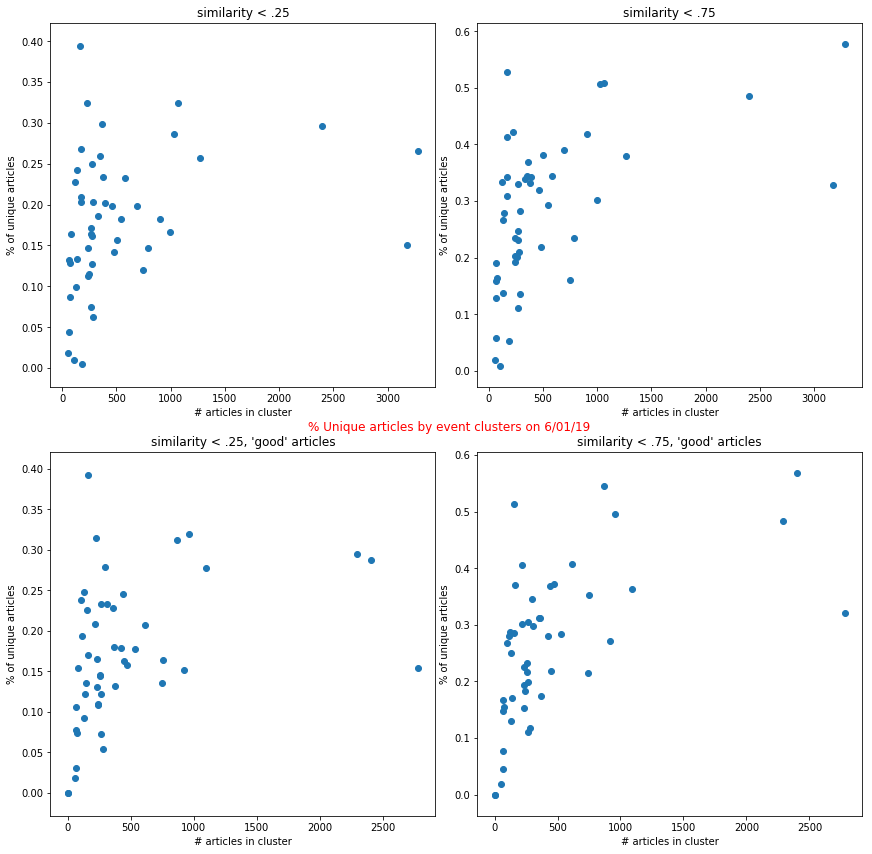

In [14]:
results = pd.read_csv(os.path.join("results", "results_20190601_clusters_temp.csv"))
results = results[[not i for i in np.isnan(results["unique25"])]]
# results.loc[results["n"] > 500, "n"] = 500

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6))
fig.tight_layout()
fig.suptitle("% Unique articles by event clusters on 6/01/19", color = "red")
fig.subplots_adjust(top = 1.9)

ax1 = axes[0][0]
ax1.scatter(results.loc[:, "n"], results.loc[:, "unique25"])
ax1.set_title("similarity < .25")
ax1.set_xlabel("# articles in cluster")
ax1.set_ylabel("% of unique articles")

ax2 = axes[0][1]
ax2.scatter(results.loc[:, "n"], results.loc[:, "unique75"])
ax2.set_title("similarity < .75")
ax2.set_xlabel("# articles in cluster")
ax2.set_ylabel("% of unique articles")

ax3 = axes[1][0]
ax3.scatter(results.loc[:, "n_good"], results.loc[:, "unique25_good"])
ax3.set_title("similarity < .25, 'good' articles")
ax3.set_xlabel("# articles in cluster")
ax3.set_ylabel("% of unique articles")

ax4 = axes[1][1]
ax4.scatter(results.loc[:, "n_good"], results.loc[:, "unique75_good"])
ax4.set_title("similarity < .75, 'good' articles")
ax4.set_xlabel("# articles in cluster")
ax4.set_ylabel("% of unique articles")

print("Average % unique articles, weighted by cluster size (thresh = 0.25): ", np.sum(results.loc[:, "n"] * results.loc[:, "unique25"])/np.sum(results.loc[:, "n"]))
print("thresh = 0.75: ", np.sum(results.loc[:, "n"] * results.loc[:, "unique75"])/np.sum(results.loc[:, "n"]))
print("Average % unique 'good' articles, weighted by cluster size (thresh = 0.25): ", np.sum(results.loc[:, "n_good"] * results.loc[:, "unique25_good"])/np.sum(results.loc[:, "n_good"]))
print("thresh = 0.75: ", np.sum(results.loc[:, "n_good"] * results.loc[:, "unique75_good"])/np.sum(results.loc[:, "n_good"]))

In [15]:
results

,event,n,unique25,unique75,n_good,unique25_good,unique75_good
0,1,3175,0.150866,0.328189,2779.0,0.154372,0.319899
2,3,3280,0.266159,0.577439,2404.0,0.287022,0.568220
3,6,790,0.146835,0.235443,744.0,0.135753,0.215054
4,8,750,0.120000,0.161333,448.0,0.162946,0.218750
5,9,479,0.141962,0.219207,372.0,0.131720,0.174731
6,10,1267,0.256511,0.378848,1094.0,0.277879,0.362888
7,12,2399,0.295540,0.484785,2293.0,0.294810,0.482774
8,13,269,0.074349,0.111524,263.0,0.072243,0.110266
9,14,464,0.198276,0.318966,425.0,0.178824,0.280000
10,15,187,0.005348,0.053476,0.0,0.000000,0.000000


Average % unique articles, weighted by cluster size (thresh = 0.25):  0.49489546781769717
thresh = 0.75:  0.7006815285006982
Average % unique 'good' articles, weighted by cluster size (thresh = 0.25):  0.15859870404379917
thresh = 0.75:  0.2827540801829585


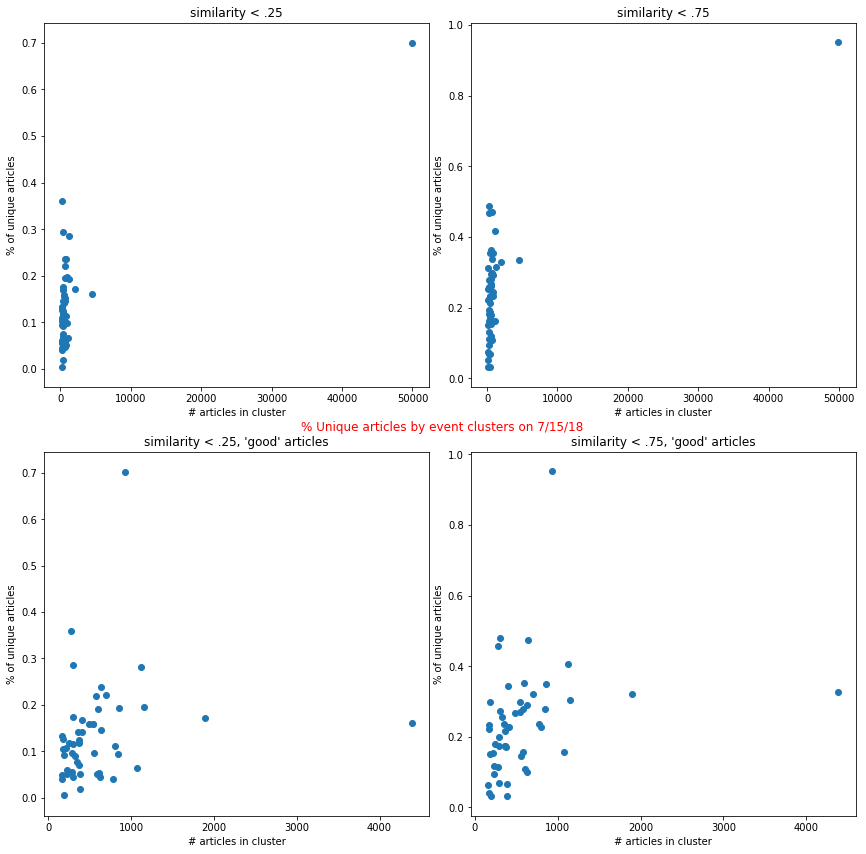

In [6]:
results = pd.read_csv(os.path.join("results", "results_20180715_clusters.csv"))
results = results[[not i for i in np.isnan(results["unique25"])]]
# results.loc[results["n"] > 500, "n"] = 500

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6))
fig.tight_layout()
fig.suptitle("% Unique articles by event clusters on 7/15/18", color = "red")
fig.subplots_adjust(top = 1.9)

ax1 = axes[0][0]
ax1.scatter(results.loc[:, "n"], results.loc[:, "unique25"])
ax1.set_title("similarity < .25")
ax1.set_xlabel("# articles in cluster")
ax1.set_ylabel("% of unique articles")

ax2 = axes[0][1]
ax2.scatter(results.loc[:, "n"], results.loc[:, "unique75"])
ax2.set_title("similarity < .75")
ax2.set_xlabel("# articles in cluster")
ax2.set_ylabel("% of unique articles")

ax3 = axes[1][0]
ax3.scatter(results.loc[:, "n_good"], results.loc[:, "unique25_good"])
ax3.set_title("similarity < .25, 'good' articles")
ax3.set_xlabel("# articles in cluster")
ax3.set_ylabel("% of unique articles")

ax4 = axes[1][1]
ax4.scatter(results.loc[:, "n_good"], results.loc[:, "unique75_good"])
ax4.set_title("similarity < .75, 'good' articles")
ax4.set_xlabel("# articles in cluster")
ax4.set_ylabel("% of unique articles")

print("Average % unique articles, weighted by cluster size (thresh = 0.25): ", np.sum(results.loc[:, "n"] * results.loc[:, "unique25"])/np.sum(results.loc[:, "n"]))
print("thresh = 0.75: ", np.sum(results.loc[:, "n"] * results.loc[:, "unique75"])/np.sum(results.loc[:, "n"]))
print("Average % unique 'good' articles, weighted by cluster size (thresh = 0.25): ", np.sum(results.loc[:, "n_good"] * results.loc[:, "unique25_good"])/np.sum(results.loc[:, "n_good"]))
print("thresh = 0.75: ", np.sum(results.loc[:, "n_good"] * results.loc[:, "unique75_good"])/np.sum(results.loc[:, "n_good"]))

In [7]:
results

,event,n,unique25,unique75,n_good,unique25_good,unique75_good
0,0.0,4551,0.160844,0.335531,4387.0,0.161386,0.327787
1,1.0,1215,0.193416,0.316049,1153.0,0.195143,0.305291
2,2.0,1096,0.065693,0.162409,1071.0,0.064426,0.156863
3,3.0,2033,0.172159,0.328087,1896.0,0.170886,0.322257
4,4.0,625,0.054400,0.120000,607.0,0.052718,0.107084
5,5.0,616,0.056818,0.180195,584.0,0.051370,0.157534
6,6.0,810,0.113580,0.233333,800.0,0.111250,0.226250
7,7.0,567,0.102293,0.153439,554.0,0.097473,0.144404
8,8.0,655,0.145038,0.299237,632.0,0.145570,0.291139
9,9.0,386,0.054404,0.069948,383.0,0.052219,0.065274
